In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

In [2]:
data_path = '/kaggle/input/trashnet/dataset-resized'

images = []
labels = []

dir = os.listdir(data_path)
for i in range(len(dir)):
    for image in os.listdir(data_path + '/' + dir[i]):
        img = cv2.imread(data_path + '/' + dir[i] + '/' + image)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(i)  

print(len(images), len(labels))

2527 2527


In [3]:
#Preprocess

data = np.array(images)
norm_data = data.astype('float32') / 255.0
label_arr = utils.to_categorical(labels)

print("Data shape:", norm_data.shape)
print("Labels shape:", label_arr.shape)  

Data shape: (2527, 224, 224, 3)
Labels shape: (2527, 6)


In [4]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

x_train, x_test, y_train, y_test = train_test_split(norm_data, label_arr, test_size=0.2)

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (2021, 224, 224, 3)
Testing set size: (506, 224, 224, 3)


In [5]:
# CNN MODEL

batch = 32
epochs = 30
#learning_rate = 0.001

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,080,902 (38.46 MB)

 Trainable params: 10,080,902 (38.46 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on training data
datagen.fit(x_train)

# Use it during model training
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    validation_data=(x_test, y_test),
                    epochs=epochs)


#history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/64 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.6058 - loss: 1.7301

I0000 00:00:1734244896.672635     144 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 24 bytes spill stores, 24 bytes spill loads



64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 326ms/step - accuracy: 0.6023 - loss: 1.6251 - val_accuracy: 0.6581 - val_loss: 0.9882
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.6863 - loss: 0.8829 - val_accuracy: 0.7372 - val_loss: 0.7325
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.7354 - loss: 0.7622 - val_accuracy: 0.7154 - val_loss: 0.8347
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - accuracy: 0.7350 - loss: 0.7066 - val_accuracy: 0.7628 - val_loss: 0.6682
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.7698 - loss: 0.6331 - val_accuracy: 0.7964 - val_loss: 0.6066
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - accuracy: 0.7572 - loss: 0.6667 - val_accuracy: 0.7470 - val_loss: 0.6691
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.7409 - loss: 0.7066 - val_accuracy: 0.7964 - val_loss: 0.5921
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.7660 - loss: 0.6307 - val_accuracy: 0.778

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7921 - loss: 0.5429
Test Accuracy: 0.8063241243362427


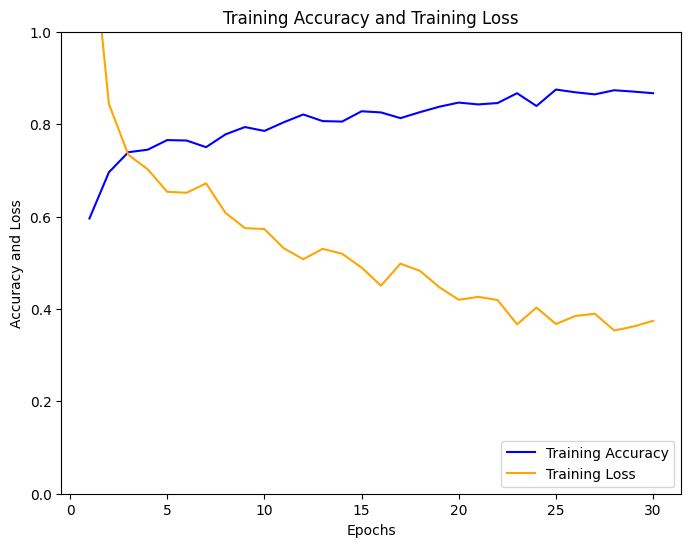

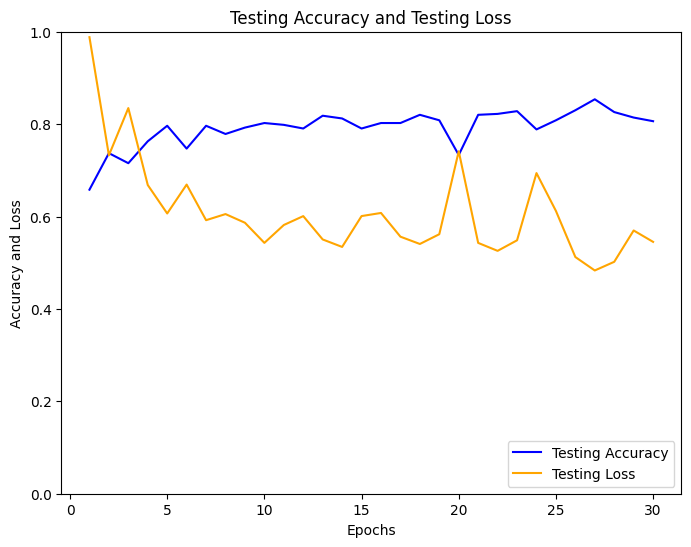

In [27]:
import matplotlib.pyplot as plt

normalized_test_acc = test_acc * 100  
normalized_test_loss = test_loss * 100 

labels = ['Testing Accuracy', 'Testing Loss']
values = [normalized_test_acc, normalized_test_loss]

# plt.figure(figsize=(8, 6))
# plt.title('Accuracy and Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy and Loss %')
# plt.ylim(0, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['loss'], label='Training Loss')
# plt.legend()
# plt.show()

training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
testing_loss = history.history['val_loss']
epochs_range = range(1, len(training_accuracy) + 1) 

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs_range, training_loss, label='Training Loss', color='orange')

plt.title('Training Accuracy and Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.ylim(0, 1)  
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, testing_accuracy, label='Testing Accuracy', color='blue')
plt.plot(epochs_range, testing_loss, label='Testing Loss', color='orange')

plt.title('Testing Accuracy and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.ylim(0, 1)  
plt.legend(loc='lower right')
plt.show()


<Figure size 1200x600 with 0 Axes>

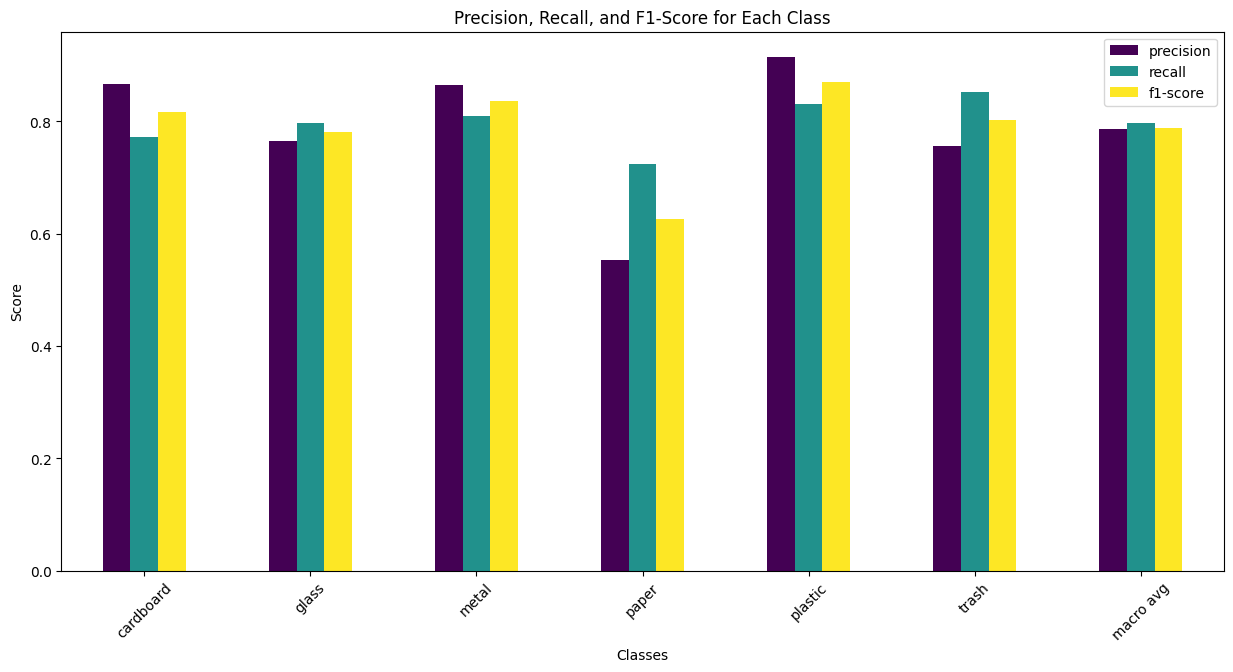

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df.drop(['accuracy']).iloc[:-1, :-1]  

plt.figure(figsize=(12, 6))
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 7), colormap='viridis')

plt.title("Precision, Recall, and F1-Score for Each Class")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class indices

# Get the predicted classes (already computed)
y_pred_classes = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Generate a detailed classification report
report = classification_report(y_true, y_pred_classes, target_names=classes)
print("\nClassification Report:\n", report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy: 80.63%
Precision: 0.82
Recall: 0.81
F1-Score: 0.81

Classification Report:
               precision    recall  f1-score   support

   cardboard       0.87      0.77      0.82       101
       glass       0.77      0.80      0.78        94
       metal       0.86      0.81      0.84       110
       paper       0.55      0.72      0.63        29
     plastic       0.91      0.83      0.87        77
       trash       0.76      0.85      0.80        95

    accuracy                           0.81       506
   macro avg       0.79      0.80      0.79       506
weighted avg       0.82      0.81      0.81       506



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


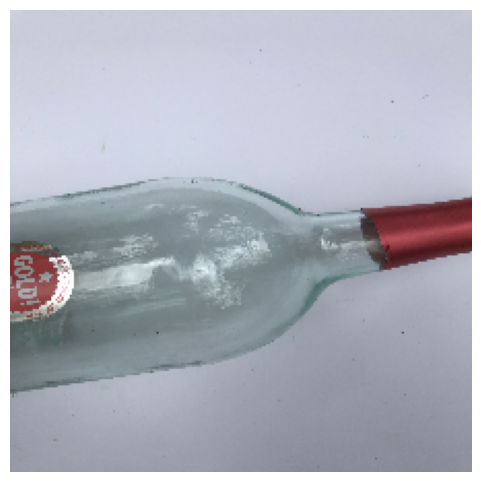

The predicted class is: glass
Predictions (probabilities) for all classes:
cardboard: 0.0001
glass: 0.5156
metal: 0.0002
paper: 0.4767
plastic: 0.0000
trash: 0.0074


In [31]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the test image
img_path = '/kaggle/input/trashnet-training-data/Testing Data/Testing Data/glass/glass103.jpg'

# Load and preprocess the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (224, 224))
img_normalized = img_resized.astype('float32') / 255.0
img_input = np.expand_dims(img_normalized, axis=0)

predictions = model.predict(img_input)
predicted_class_index = np.argmax(predictions)
predicted_class = classes[predicted_class_index]

plt.figure(figsize=(6, 6))
plt.imshow(img_resized)  
plt.axis('off') 
plt.show()
print(f"The predicted class is: {predicted_class}") 

#all class probabilities
print("Predictions (probabilities) for all classes:")
for i, prob in enumerate(predictions[0]):
    print(f"{classes[i]}: {prob:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


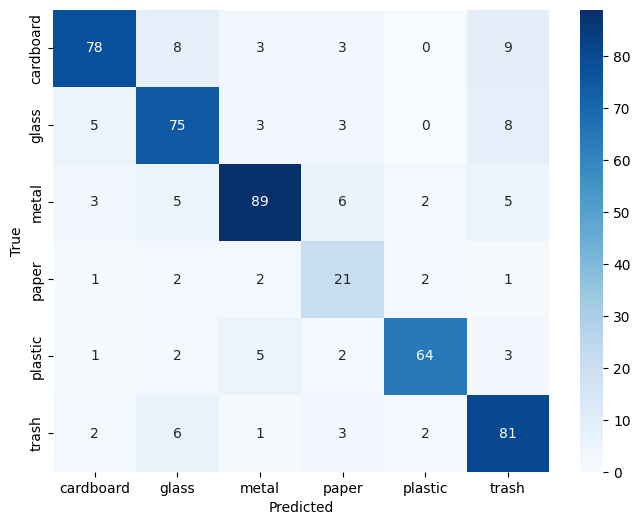

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()